In [55]:
# Importing libraries that will be required throughout the file

# To read file and create dataframe

import pandas as pd
import numpy as np

# Libraries for visualization 

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for model generation

import statsmodels.api as sm
from difflib import get_close_matches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#settings to ignore warnings

import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')

### <b>Data Understanding</b>

In [2]:
# Read CSV file into a dataframe

car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Getting a gist of the data
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
print('\n---------------------------------Below table shows the statistical data of the dataset------------------------------------')
car.describe()


---------------------------------Below table shows the statistical data of the dataset------------------------------------


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
# Understandig the spread of the data

print('Car dataframe has ' + str(car.shape) + ' number of rows and columns respectively')

Car dataframe has (205, 26) number of rows and columns respectively


In [6]:
#checking number of unique values in each column
print('\n ---------------------------------Below table shows the number of unique values in each column-----------------------')
car.nunique()


 ---------------------------------Below table shows the number of unique values in each column-----------------------


car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [7]:
# Taking out Company Name from CarName column
print('\n************    Let us analyze CarName column and split to take out CompanyName   ***********')
car['CompanyName'] = car['CarName'].str.split().str.get(0)
car['CompanyName'].value_counts()


************    Let us analyze CarName column and split to take out CompanyName   ***********


toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
alfa-romero     3
jaguar          3
maxda           2
vw              2
renault         2
porcshce        1
vokswagen       1
toyouta         1
mercury         1
Nissan          1
Name: CompanyName, dtype: int64

<b>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b><br>
From the above table we observe that there are few misspelled values in the CompanyName column. Let us replace following values:

<b>toyouta : toyota</b><br>
<b>porcshce : porsche</b><br>
<b>maxda : mazda</b><br>
<b>Nissan : nissan</b><br>
<b>vokswagen : volkswagen</b><br>
<b>vw : volkswagen</b><br>

The approach uses get_close_matches algorithm which finds the closest match to a given misspelled word. In place of this approach, we can use replace function also.

In [8]:
# treating misspelled values in CompanyName column using get_close_match algorithm

CompanyName_unique = list(car['CompanyName'].value_counts().index)

car['CompanyName'] = car['CompanyName'].replace(['toyouta'], get_close_matches('toyouta', CompanyName_unique)[1])
car['CompanyName'] = car['CompanyName'].replace(['porcshce'], get_close_matches('porcshce', CompanyName_unique)[1])
car['CompanyName'] = car['CompanyName'].replace(['maxda'], get_close_matches('maxda', CompanyName_unique)[1])
car['CompanyName'] = car['CompanyName'].replace(['Nissan'], get_close_matches('Nissan', CompanyName_unique)[1])
car['CompanyName'] = car['CompanyName'].replace(['vokswagen'], get_close_matches('vokswagen', CompanyName_unique)[1])
car['CompanyName'] = car['CompanyName'].replace(['vw'],'volkswagen')

### <b>Data Visualization</b>


 Analyzing correlation between columns using scatterplot which tells about the relationship between different columns


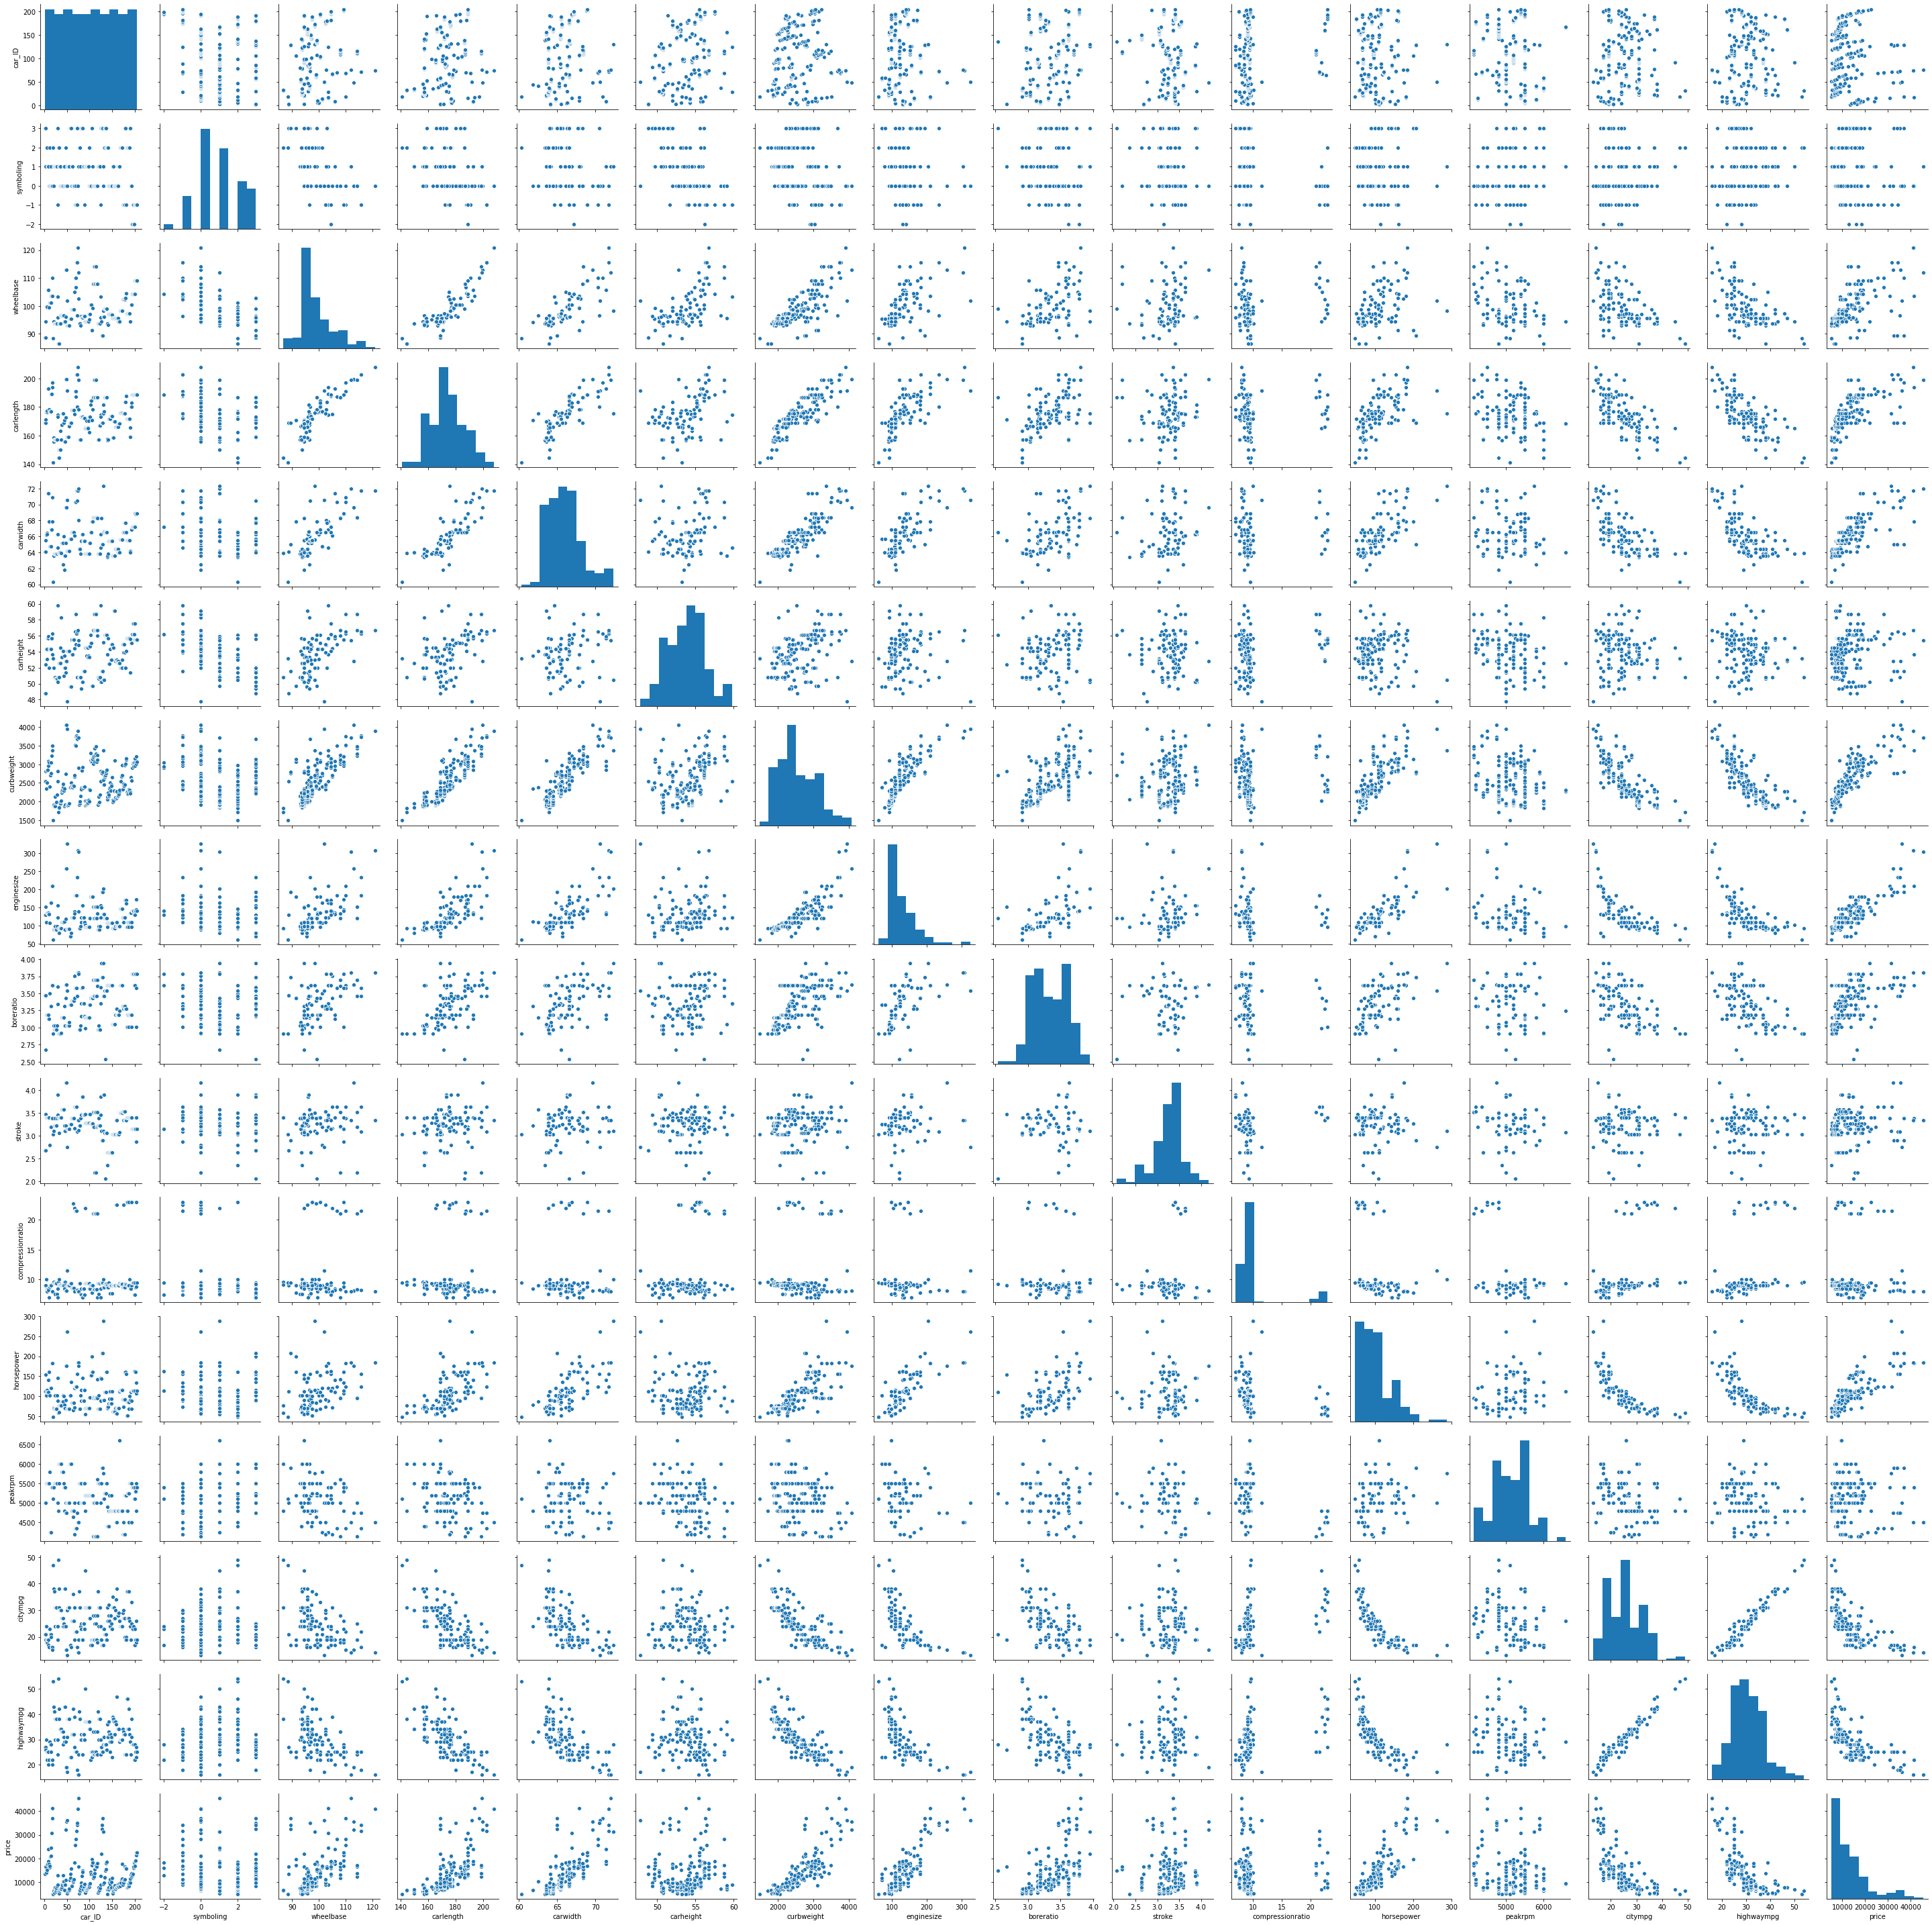

In [9]:
# PairPlot to understand the correlation between different columns

print('\n Analyzing correlation between columns using scatterplot which tells about the relationship between different columns')
sns.pairplot(car)
plt.show()

<b>As we know when independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable. The stronger the correlation, the more difficult it is to change one variable without changing another.</b>

The graph above shows few columns that are highly correlated.
Lets drop the below mentioned columns to avoid multicollinearity:

* <b>carwidth</b>
* <b>carlength</b>
* <b>citympg</b>

In [10]:
# drop columns having one columns which have high correlation with other columns

car.drop(['carwidth','carlength','citympg'], axis =1, inplace = True)

In [11]:
# analyzing categorical varaibles from the database with respect to price 

def plot_cat_columns(col_list):
    plt.figure(figsize=(20, 15))
    for var in col_list:
        plt.subplot(3,3,col_list.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = car)
    plt.show()


In [12]:
# Let us put all categorical columns in one list for further analysis
# another approach can be to see the dtype and segregate as per that

cat_list = ['fueltype','aspiration', 'doornumber','enginelocation','drivewheel','carbody','enginetype','cylindernumber','fuelsystem']


---------------Below plot shows boxplot for all categorical variables to understand the dataspread----------------


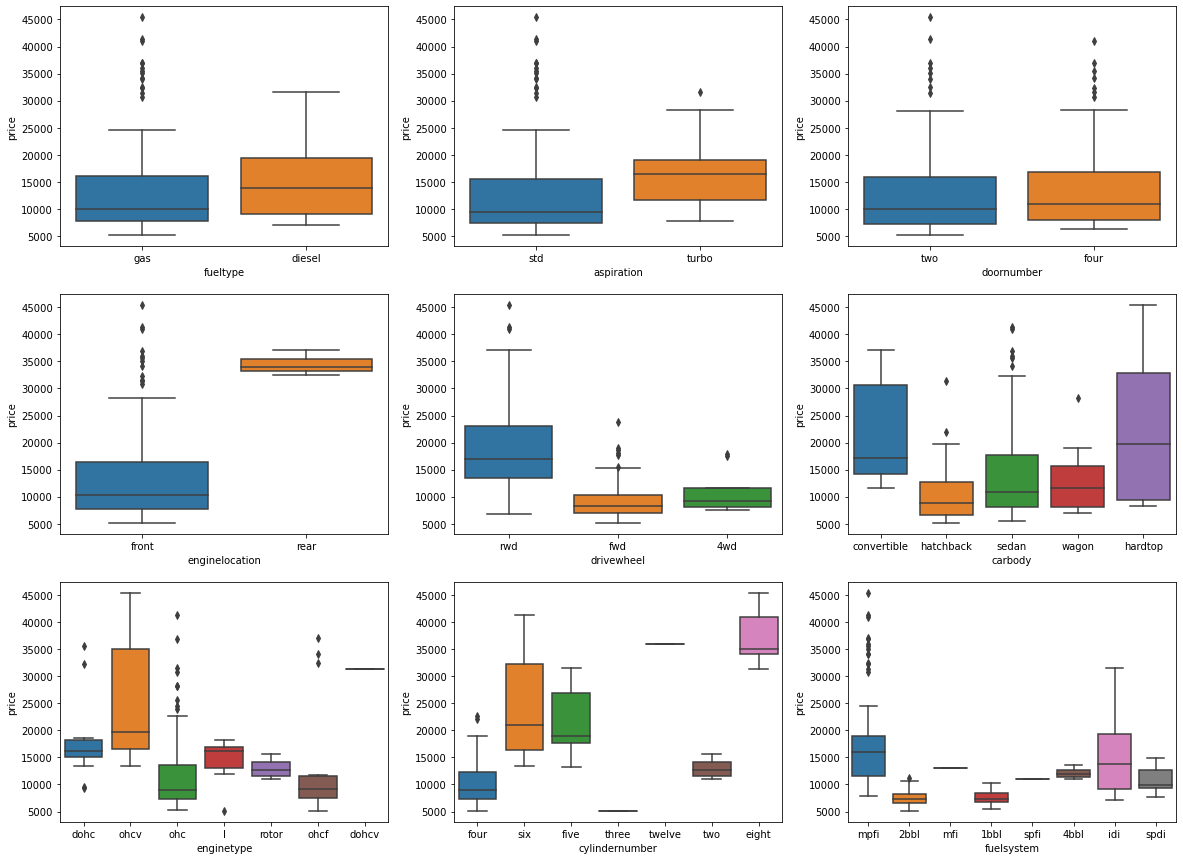

In [13]:
print('\n---------------Below plot shows boxplot for all categorical variables to understand the dataspread----------------')
plot_cat_columns(cat_list)

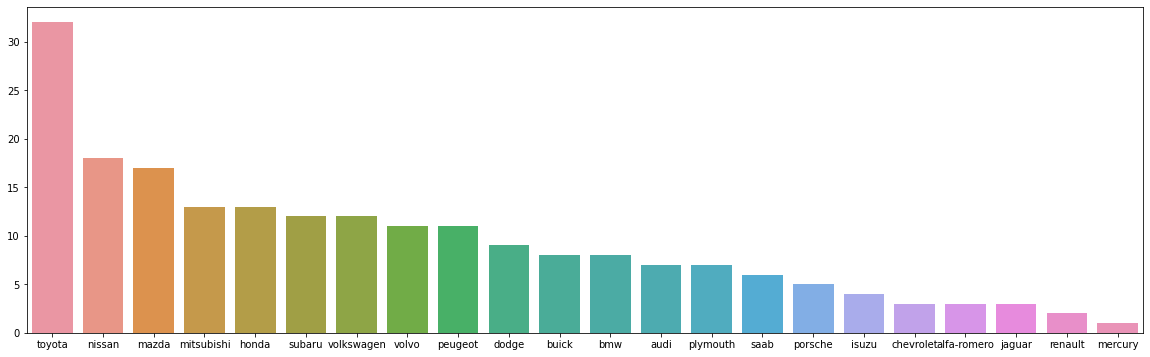

In [14]:
# Analyzing CompanyName columns which we just created.

fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = car['CompanyName'].value_counts().index, y = car['CompanyName'].value_counts().values, data = car , ax = ax)
plt.show()

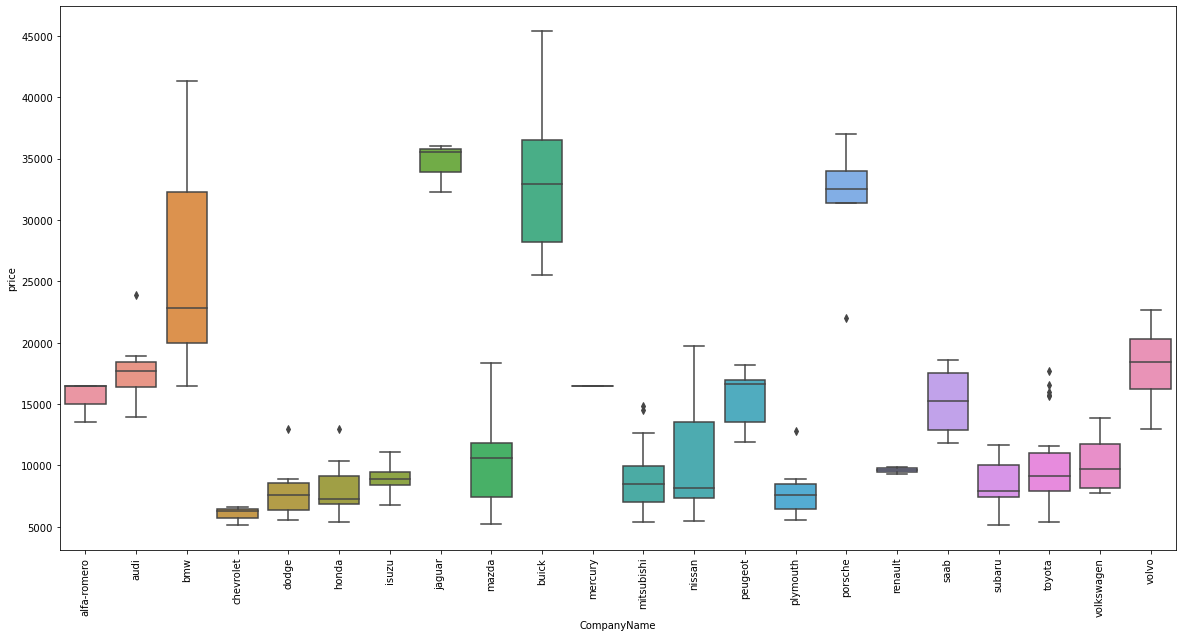

In [15]:
# Creating boxplot for CompanyName to see the spread of each unique values

plt.figure(figsize=(20,10))
sns.boxplot(x = 'CompanyName', y = 'price', data = car)
plt.xticks(rotation=90)
plt.show()


<b>--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>
### EDA



After seeing the CompanyName we found out that there are 22 unique values. This will create a lot of dummy variables. Thus for ease in modelling we will convert these 22 unique values into 3 main categories and later dummies only on these categories.

So based on the mean price of each company we will divide them into <b>low price, moderate price, expensive</b>

In [16]:
mean_company_group = pd.DataFrame(car.groupby('CompanyName').price.mean().sort_values(ascending=False))
print('--------------------------- Below table shows the mean price for each company in CompanyName column ---------------------')
mean_company_group

--------------------------- Below table shows the mean price for each company in CompanyName column ---------------------


,price
CompanyName,
jaguar,34600.000000
buick,33647.000000
porsche,31400.500000
bmw,26118.750000
volvo,18063.181818
audi,17859.166714
mercury,16503.000000
alfa-romero,15498.333333
peugeot,15489.090909


In [17]:
# Creating list of company names that are below 10000

low_price_df = mean_company_group[mean_company_group['price'] < 10000]
low_price_list = list(low_price_df.index)
print('List for companyname that has mean price less than 10000 are ' + str(low_price_list))

List for companyname that has mean price less than 10000 are ['toyota', 'renault', 'mitsubishi', 'isuzu', 'subaru', 'honda', 'plymouth', 'dodge', 'chevrolet']


In [18]:
# Creating list of company names that lie in the range of 10000 to 20000

med_price_df = mean_company_group[(mean_company_group['price'] <= 20000) & (mean_company_group['price'] > 10000) ]
med_price_list = list(med_price_df.index)
print('List for companyname that has mean price which lie in the range of 10000 to 20000 are ' + str(med_price_list))

List for companyname that has mean price which lie in the range of 10000 to 20000 are ['volvo', 'audi', 'mercury', 'alfa-romero', 'peugeot', 'saab', 'mazda', 'nissan', 'volkswagen']


In [19]:
# Creating list of company names that are above 20000

high_price_df = mean_company_group[(mean_company_group['price'] >= 20000)]
high_price_list = list(high_price_df.index)
print('List for companyname that has mean price greater than 20000 are ' + str(high_price_list))

List for companyname that has mean price greater than 20000 are ['jaguar', 'buick', 'porsche', 'bmw']


In [20]:
# Let us replace CompanyName with their categories which we created above

car['CompanyName'] = car['CompanyName'].replace([low_price_list], 'low price')
car['CompanyName'] = car['CompanyName'].replace([med_price_list], 'moderate price')
car['CompanyName'] = car['CompanyName'].replace([high_price_list], 'expensive')

In [21]:
# verifying the change and calculating the value_counts for each type
car['CompanyName'].value_counts()

low price         95
moderate price    86
expensive         24
Name: CompanyName, dtype: int64

In [22]:
#Let us analyze the categorical columns that have only 2 unique values

print('Unique values in fueltype column are : ' + str(car['fueltype'].value_counts().index[0]) + ' and ' + str(car['fueltype'].value_counts().index[1]))
print('Unique values in aspiration column are : ' + str(car['aspiration'].value_counts().index[0]) + ' and ' + str(car['aspiration'].value_counts().index[1]))
print('Unique values in doornumber column are : ' + str(car['doornumber'].value_counts().index[0]) + ' and ' + str(car['doornumber'].value_counts().index[1]))
print('Unique values in enginelocation column are : ' + str(car['enginelocation'].value_counts().index[0]) + ' and ' + str(car['enginelocation'].value_counts().index[1]))

Unique values in fueltype column are : gas and diesel
Unique values in aspiration column are : std and turbo
Unique values in doornumber column are : four and two
Unique values in enginelocation column are : front and rear


<b>Categorical variables should be converted to numerical type so that model can fit. For columns having 1 or 2 categorical variables, we can replace them directly using map function.

For columns having more than 2 categorical variable, we will use get_dummies function later.</b>

In [23]:
# mapping columns having only 2 unique values
car['fueltype'] = car['fueltype'].map({ 'diesel': 0, 'gas':1})
car['aspiration'] = car['aspiration'].map({ 'std': 0, 'turbo':1})
car['doornumber'] = car['doornumber'].map({ 'four': 0, 'two':1})
car['enginelocation'] = car['enginelocation'].map({ 'front': 0, 'rear':1})

In [24]:
# Dropping unnecessary columns

car.drop(columns = ['CarName','car_ID'], inplace = True, axis = 1)

In [25]:
# For other categorical variables we will use get_dummies function

car_demo = pd.get_dummies(car, drop_first = True)

In [26]:
print('After creating dummies we get total ' + str(len(car_demo.columns)) + ' now in our dataset')
print('-------------------------------------------------------------------------------------------------------------')
print(car_demo.columns)

After creating dummies we get total 43 now in our dataset
-------------------------------------------------------------------------------------------------------------
Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'highwaympg',
       'price', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CompanyName_low price',
       'CompanyName_mo

# MODELLING

## Train Test Split

The very first step of any model building is dividing the data into <b>train and test data.</b>

Train data refers to the data with which our model is trained to make predictions.

Test data is used to validate the model outcomes when the outcomes are been predicted using the build model.

For this train_test_split is used where we divide the data into 70 - 30 ratio where 70% data is for train set and 30% data is for test set.

In [27]:
#train test split

df_train, df_test = train_test_split(car_demo, train_size = 0.7, test_size = 0.3, random_state = 100)

<b>Scaling</b> is a technique where all the independent variables are standardized to a fixed range.

It is done to handle highly varying magnitudes or values or units in a dataset which can be problem for machine learning algorithms as they use Euclidean distance between 2 points in their computations.

Here we are using MinMaxScaler() where the values are standardized in the range of [0,1]


In [28]:
# minmaxscaler for normalization

scaler = MinMaxScaler()

We apply fit on the training dataset and use the transform method on both - the training dataset and the test dataset. 

In [29]:
# Creating a list of all the numerical columns for which scaling should be done

col_to_norm = ['curbweight','symboling','highwaympg','wheelbase','carheight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','price']

df_train[col_to_norm] = scaler.fit_transform(df_train[col_to_norm])

df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyName_low price,CompanyName_moderate price
122,0.6,1,0,0,0,0.244828,0.265487,0.272692,0.139623,0.230159,...,0,1,0,0,0,0,0,0,1,0
125,1.0,1,0,1,0,0.272414,0.212389,0.500388,0.339623,1.000000,...,0,0,0,0,0,1,0,0,0,0
166,0.6,1,0,1,0,0.272414,0.424779,0.314973,0.139623,0.444444,...,0,0,0,0,0,1,0,0,1,0
1,1.0,1,0,1,0,0.068966,0.088496,0.411171,0.260377,0.626984,...,0,0,0,0,0,1,0,0,0,1
199,0.2,1,1,0,0,0.610345,0.858407,0.647401,0.260377,0.746032,...,0,0,0,0,0,1,0,0,0,1


After the normalization is done on the train dataset, we divide the train dataset into independent variables and dependent variable to fit our model. 

In this case, <b>price</b> acts as our dependent variables that has to be predicted and all other variables act as independent variables which will help predicting price .

In [30]:
# we pop price from dataframe and save it as y_train and other columns as X_train

y_train = df_train.pop('price')
X_train = df_train

In [31]:
X_train

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyName_low price,CompanyName_moderate price
122,0.6,1,0,0,0,0.244828,0.265487,0.272692,0.139623,0.230159,...,0,1,0,0,0,0,0,0,1,0
125,1.0,1,0,1,0,0.272414,0.212389,0.500388,0.339623,1.000000,...,0,0,0,0,0,1,0,0,0,0
166,0.6,1,0,1,0,0.272414,0.424779,0.314973,0.139623,0.444444,...,0,0,0,0,0,1,0,0,1,0
1,1.0,1,0,1,0,0.068966,0.088496,0.411171,0.260377,0.626984,...,0,0,0,0,0,1,0,0,0,1
199,0.2,1,1,0,0,0.610345,0.858407,0.647401,0.260377,0.746032,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.6,1,1,0,0,0.334483,0.336283,0.354926,0.184906,0.388889,...,0,0,0,0,0,0,1,0,1,0
103,0.4,1,0,0,0,0.475862,0.646018,0.609775,0.452830,0.595238,...,0,0,0,0,0,1,0,0,0,1
67,0.2,0,1,0,0,0.806897,0.769912,0.786268,0.460377,0.714286,...,0,0,0,1,0,0,0,0,0,0
24,0.6,1,0,0,0,0.244828,0.247788,0.185803,0.109434,0.230159,...,0,1,0,0,0,0,0,0,1,0


Linear Regression function from skleran.model_selection library.

The function fits the given X_train and y_train.

<b>RFE</b> (Recursive Feature Elimination) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. In our case we have given RFE to select top 10 features from all the features.

In [32]:
# fitting linear regression model and RFE to extract 10 best features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [33]:
print('Below list shows the columns and their ranking after selecting top 10 features using RFE\n')
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

Below list shows the columns and their ranking after selecting top 10 features using RFE



[('symboling', False, 21),
 ('fueltype', False, 20),
 ('aspiration', False, 16),
 ('doornumber', False, 27),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carheight', False, 14),
 ('curbweight', True, 1),
 ('enginesize', False, 9),
 ('boreratio', False, 11),
 ('stroke', False, 8),
 ('compressionratio', False, 29),
 ('horsepower', True, 1),
 ('peakrpm', False, 13),
 ('highwaympg', False, 3),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', False, 2),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 25),
 ('drivewheel_rwd', False, 26),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 31),
 ('enginetype_ohc', False, 10),
 ('enginetype_ohcf', False, 12),
 ('enginetype_ohcv', False, 17),
 ('enginetype_rotor', False, 7),
 ('cylindernumber_five', False, 18),
 ('cylindernumber_four', False, 30),
 ('cylindernumber_six', False, 19),
 ('cylindernumber_three', False, 6),
 ('cylindernumber_twelve', False, 4),
 ('cylindernumber_two', False

In [34]:
# out of all the columns given above, we will only use top 10 features that are given by RFE using rfe.support_

col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'curbweight', 'horsepower',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_wagon',
       'enginetype_dohcv', 'CompanyName_low price',
       'CompanyName_moderate price'],
      dtype='object')

In [35]:
# printing columns that have been eliminated by RFE
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carheight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'highwaympg', 'carbody_sedan', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

Let us create a new training data for the columns which we got from RFE. Thus below given X_train_rfe will contain only those columns and will be used by further for model building.

In [36]:
# Selecting those columns which are selecting by RFE model 

X_train_rfe = X_train[col]
X_train_rfe

,enginelocation,wheelbase,curbweight,horsepower,carbody_hardtop,carbody_hatchback,carbody_wagon,enginetype_dohcv,CompanyName_low price,CompanyName_moderate price
122,0,0.244828,0.272692,0.083333,0,0,0,0,1,0
125,0,0.272414,0.500388,0.395833,0,1,0,0,0,0
166,0,0.272414,0.314973,0.266667,0,1,0,0,1,0
1,0,0.068966,0.411171,0.262500,0,0,0,0,0,1
199,0,0.610345,0.647401,0.475000,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
87,0,0.334483,0.354926,0.283333,0,0,0,0,1,0
103,0,0.475862,0.609775,0.433333,0,0,0,0,0,1
67,0,0.806897,0.786268,0.312500,0,0,0,0,0,0
24,0,0.244828,0.185803,0.083333,0,1,0,0,1,0


Let us fit our model using X_train_rfe that we created above. Later to see the summary i.e the metrics of the model we wil use <b>summary()</b> function which will help us analyze all parameters that can effect the model buidling.

In [37]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfe).fit()

In [38]:
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     167.1
Date:                Sun, 31 May 2020   Prob (F-statistic):           7.85e-70
Time:                        22:47:54   Log-Likelihood:                 203.88
No. Observations:                 143   AIC:                            -385.8
Df Residuals:                     132   BIC:                            -353.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

From the above summary for our first model we saw that <b>R-squared</b> value is quiet acceptable and difference between <b>Adjusted R-squared and R-square</b> is not that high but we can see that p-value for few columns is above 5. Now let us calculate VIF for above columns to figure out correlated columns 

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,33.33
3,curbweight,9.73
9,CompanyName_low price,5.17
4,horsepower,5.09
2,wheelbase,4.08
10,CompanyName_moderate price,3.96
1,enginelocation,1.72
5,carbody_hardtop,1.52
6,carbody_hatchback,1.39
8,enginetype_dohcv,1.39


From above <b>VIF</b> table we see that few columns have VIF above 5 that is greater than cutoff. This shows that these columns have high correlation with other columns thus have to drop these columns based on p-value and VIF.

# Removing columns

Let us start by removing columns one by one from our initial models, to get our best fit model. After dropping columns we will again compare p-value and VIF of all the columns and decide as per that which columns we can delete.

Let us first delete <b>carbody_hardtop</b> column as the <b>p-value</b> for this column is <b>0.548</b> which is quiet high.

In [40]:
# dropping column carbody_hardtop and bulding lm_2 model
X_train2 = X_train_rfe.drop('carbody_hardtop', 1)
lm_2 = sm.OLS(y_train,X_train2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     186.5
Date:                Sun, 31 May 2020   Prob (F-statistic):           6.68e-71
Time:                        22:47:54   Log-Likelihood:                 203.68
No. Observations:                 143   AIC:                            -387.4
Df Residuals:                     133   BIC:                            -357.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,33.30
3,curbweight,9.73
8,CompanyName_low price,5.16
4,horsepower,5.09
2,wheelbase,4.08
9,CompanyName_moderate price,3.95
7,enginetype_dohcv,1.39
5,carbody_hatchback,1.37
1,enginelocation,1.24
6,carbody_wagon,1.24


From above interpretation, we can see that carbody_hathback column has <b>p-value which is equal to 0.267</b> and hence let us drop this column and create new model.

In [42]:
X_train3 = X_train2.drop('carbody_hatchback', 1)
lm_3 = sm.OLS(y_train,X_train3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 31 May 2020   Prob (F-statistic):           8.26e-72
Time:                        22:47:54   Log-Likelihood:                 203.02
No. Observations:                 143   AIC:                            -388.0
Df Residuals:                     134   BIC:                            -361.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,32.60
3,curbweight,9.69
7,CompanyName_low price,4.99
4,horsepower,4.97
2,wheelbase,4.02
8,CompanyName_moderate price,3.92
6,enginetype_dohcv,1.39
1,enginelocation,1.22
5,carbody_wagon,1.17


Again we see that wheelbase column has <b> p-value 0.150 which is above 0.05</b> which can create problem for our model so let us drop this column and create our 4th model.

In [44]:
X_train4 = X_train3.drop('wheelbase', 1)
lm_4 = sm.OLS(y_train,X_train4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     237.0
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.46e-72
Time:                        22:47:55   Log-Likelihood:                 201.91
No. Observations:                 143   AIC:                            -387.8
Df Residuals:                     135   BIC:                            -364.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train4.columns
vif['VIF'] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.69
6,CompanyName_low price,4.99
7,CompanyName_moderate price,3.92
2,curbweight,3.87
3,horsepower,3.73
5,enginetype_dohcv,1.38
1,enginelocation,1.21
4,carbody_wagon,1.17


We can see that as we remove columns our VIF is also falling under 5 which is our cut-off. Thus from lm_4 model summary we can see <b>enginetype_dohcv has p-value 0.162</b>. Let us remove this column and build out 5th model.

In [46]:
X_train5 = X_train4.drop('enginetype_dohcv', 1)
lm_5 = sm.OLS(y_train,X_train5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     274.2
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.25e-73
Time:                        22:47:55   Log-Likelihood:                 200.86
No. Observations:                 143   AIC:                            -387.7
Df Residuals:                     136   BIC:                            -367.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train5.columns
vif['VIF'] = [variance_inflation_factor(X_train5.values, i) for i in range(X_train5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.20
5,CompanyName_low price,4.87
6,CompanyName_moderate price,3.84
2,curbweight,3.39
3,horsepower,2.87
1,enginelocation,1.16
4,carbody_wagon,1.15


****************************************************************************************************************
******************************************************************************************************************
From the data for <b>lm_5</b> model, we can see that:

| Parameter | Value |
|:----------| :---- |
|R2_square | 0.924 |
| Adjusted R2_sqaure | 0.920 |

<b> Also all the coefficients have p-value less then the cut-off that is 0.05, and VIF values are also below 5.</b>

Thus we will use this model for our prediction.

### Predicting on y_test

We only use transform() on the test data because we use the scaling paramaters learned on the train data to scale the test data. Thus let us transform our test dataset and split it into y_test and X_test.

In [48]:
df_test[col_to_norm] = scaler.transform(df_test[col_to_norm])
df_test 

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyName_low price,CompanyName_moderate price
160,0.4,1,0,0,0,0.313793,0.460177,0.235066,0.139623,0.404762,...,0,1,0,0,0,0,0,0,1,0
186,0.8,1,0,0,0,0.368966,0.699115,0.305275,0.181132,0.404762,...,0,0,0,0,0,1,0,0,0,1
59,0.6,1,0,1,0,0.420690,0.522124,0.347944,0.230189,0.563492,...,0,1,0,0,0,0,0,0,0,1
165,0.6,1,0,1,0,0.272414,0.424779,0.301396,0.139623,0.444444,...,0,0,0,0,0,1,0,0,1,0
140,0.8,1,0,1,0,0.231034,0.699115,0.291699,0.177358,0.746032,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.2,1,0,0,0,0.575862,1.061947,0.406129,0.230189,0.523810,...,0,1,0,0,0,0,0,0,1,0
29,1.0,1,1,1,0,0.320690,0.212389,0.513189,0.358491,0.730159,...,0,0,0,0,1,0,0,0,1,0
182,0.8,0,0,1,0,0.368966,0.699115,0.299845,0.135849,0.261905,...,0,0,0,1,0,0,0,0,0,1
40,0.4,1,0,0,0,0.341379,0.557522,0.342901,0.184906,0.373016,...,0,0,0,0,0,0,0,0,1,0


In [49]:
# separating price which is our predictor variables and assign it to y_test and rest other columns to X_test

y_test = df_test.pop('price')
X_test = df_test

From RFE we got top 10 columns on which we build our training model. Later we dropped few columns to find our best model. In order to make our test data compatible with the trained model, we will drop the columns on which our model is not trained.

In [50]:
X_test = X_test[col]
X_test = X_test.drop(["carbody_hardtop",'wheelbase','enginetype_dohcv','carbody_hatchback'], axis = 1)
X_test = sm.add_constant(X_test)

Once the columns are dropped, we use X_test to predict y_test_pred based on our final model that is <b>lm_5</b>

In [51]:
y_test_pred = lm_5.predict(X_test)
y_test_pred

160    0.054628
186    0.148982
59     0.168823
165    0.128804
140    0.085267
         ...   
28     0.110033
29     0.265057
182    0.113498
40     0.123204
128    0.807019
Length: 62, dtype: float64

## Model evaluation

To evaluate the model, we will plot few plots between y_test_pred and actual y_test and analyze how good is our model performance.

Let us first check whether or not our error i.e <b>(y_test_pred - y_test) follow normal distribution</b> 

Text(0, 0.5, 'Index')

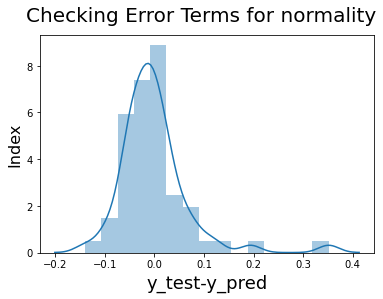

In [52]:
#distplot to check normaluty between error terms

fig = plt.figure()
sns.distplot((y_test-y_test_pred),bins=15)
fig.suptitle('Checking Error Terms for normality', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16) 

Next plot we will see the scatter plot between y_test_pred and y_test

Text(0, 0.5, 'y_test_pred')

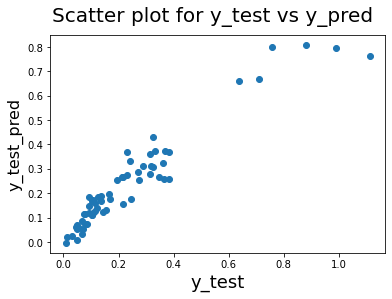

In [53]:
fig1 = plt.figure()
plt.scatter(y_test,y_test_pred)
fig1.suptitle('Scatter plot for y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)

There are few metrics that are used to evaluate the performance of our model and also to check the accuracy of the predicted variables. 

Let us now calculate <b>RMSE and R2_score</b> for our y_test_pred and y_test

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE for our final model is:    ',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_test_pred)
print('r2_score for our final model is:',r2)

RMSE for our final model is:     0.07057051846598877
r2_score for our final model is: 0.9068220290711534


# CONCLUSIONS

From our analysis we can conclude the following:

* The R2_square and Adj R2_square values for our final model lm_6 is found to be :

| Parameter | Value |
|:----------| :---- |
|R2_square | 0.924 |
| Adjusted R2_sqaure | 0.92 |

* The VIF for all the columns is below 5 and p-value is also below 0.05.


* The error terms when plotted after prediction follows <b>normality</b>


* When <b>R2_square</b> was calculated comparing <b>y_test and y_test_pred</b> it was found out to be <b>0.9068</b>.


* The <b>RMSE(Root Mean Sqaure Error)</b> for our y_test_pred and y_test is <b>0.07057</b> which makes our model a good model. 


* Thus from our lm_6 model, we can list following as the predictors of price in car dataset:

| Parameter | Coeff_value |VIF| p_value |
|:----------| :---------- |:--| :------ |
const        |                  0.2042| 31.20|0.000       
enginelocation|                 0.1961| 1.16|0.003   
curbweight     |                0.4883| 3.39 |0.000   
horsepower      |               0.2388| 2.87 |0.000   
CompanyName_low price|         -0.2862| 4.87  |0.000  
CompanyName_moderate price|    -0.2411| 3.84  |0.000
carbody_wagon   |    -0.0460 |  1.15 | 0.005




* Thus the equation for our linear regression model can be given as:


**$ PRICE = (0.2042) + (0.4883  \times  curbweight) + (0.2388 \times horsepower) + (0.1961 \times enginelocation) - (0.2862 \times CompanyName\_low\ price) - (0.2411 \times CompanyName\_moderate\ price) - (0.0460 \times carbody\_wagon)$**